In [29]:
conda update conda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\mariana.naude\AppData\Local\Continuum\anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    backports.functools_lru_cache-1.6.1|             py_0          11 KB
    conda-4.8.1                |           py37_0         2.8 MB
    future-0.18.2              |           py37_0         656 KB
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following packages will be UPDATED:

  backports.functoo~                               1.5-py_2 --> 1.6.1-py_0
  conda                                       4.7.10-py37_0 --> 4.8.1-py37_0
  future                                      0.17.1-py37_0 --> 0.18.2-py37_0




backports.functools_ | 11 KB     |            |   0% 
backports.f

In [30]:
conda install scikit-learn=0.22.1

Solving environment: ...working... 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2019.07=py37_0
  - defaults/win-64::numba==0.44.1=py37hf9181ef_0
done

## Package Plan ##

  environment location: C:\Users\mariana.naude\AppData\Local\Continuum\anaconda3

  added / updated specs:
    - scikit-learn=0.22.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2019.03  |           py37_0           6 KB
    anaconda-custom            |           py37_1           3 KB
    ca-certificates-2019.11.27 |                0         124 KB
    certifi-2019.11.28         |           py37_0         154 KB
    openssl-1.1.1d             |       he774522_3         4.8 MB
    scikit-learn-0.22.1        |   py37h6288b17_0         4.7 MB
    tbb-2019.4                 |       h74a97

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from numpy.random import seed, randn

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.size"] = 13

In [3]:
import pandas as pd
housing_train = pd.read_csv("train.csv")
housing_test= pd.read_csv("test.csv")
housing_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Definimos y como la informacion que queremos, y x con la que estimaremos
y=housing_train.SalePrice
x=housing_train.drop(columns="SalePrice")

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split,cross_validate


In [41]:
column_selector = ColumnTransformer(
    [("label_bin", make_pipeline(OneHotEncoder(sparse=False, handle_unknown="ignore"),StandardScaler()), ["MSZoning","Utilities","LotConfig","Condition1","Condition2","BldgType","HouseStyle","OverallQual","OverallCond","KitchenQual","SaleCondition"]),
    ("numeric", make_pipeline(SimpleImputer(),StandardScaler()), make_column_selector(dtype_include="float"))]
)

columns_ohe = column_selector.fit_transform(x)
columns_ohe

array([[-0.08304548, -0.21585871, -0.10526316, ..., -0.22937175,
         0.51141841,  1.02115667],
       [-0.08304548, -0.21585871, -0.10526316, ...,  0.4519361 ,
        -0.57441047, -0.10448286],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.09311018,
         0.32306034,  0.93777596],
       ...,
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.18395123,
        -0.57441047, -1.56364521],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.09311018,
        -0.57441047, -1.18843203],
       [-0.08304548, -0.21585871, -0.10526316, ...,  0.22483348,
        -0.57441047, -0.56307674]])

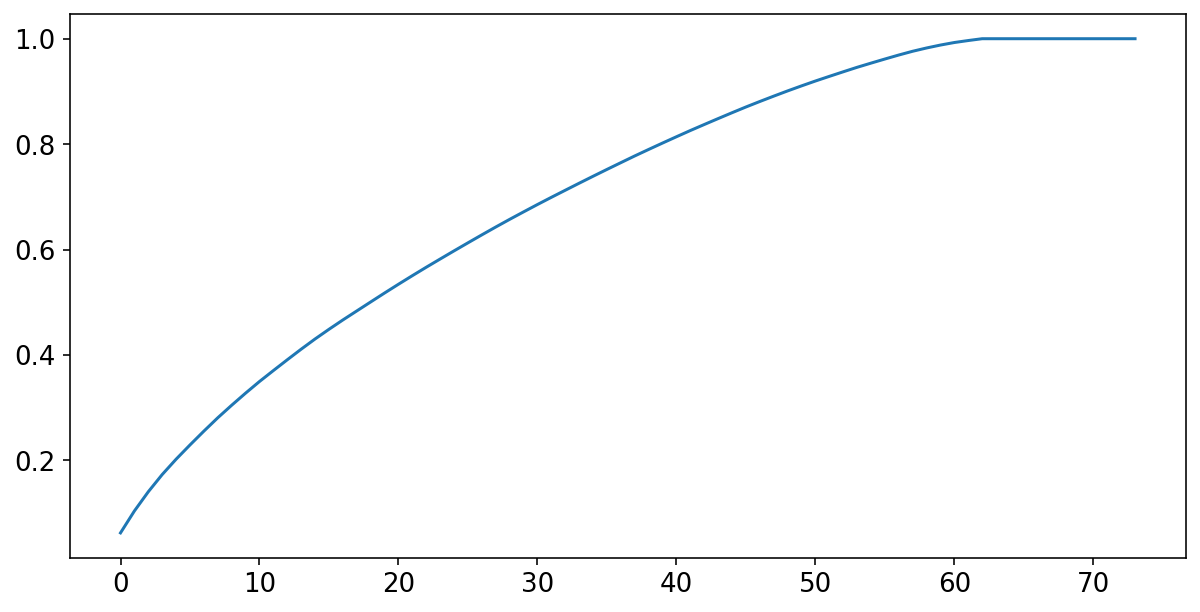

In [42]:
pca= PCA(svd_solver="full")
pca.fit(columns_ohe)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

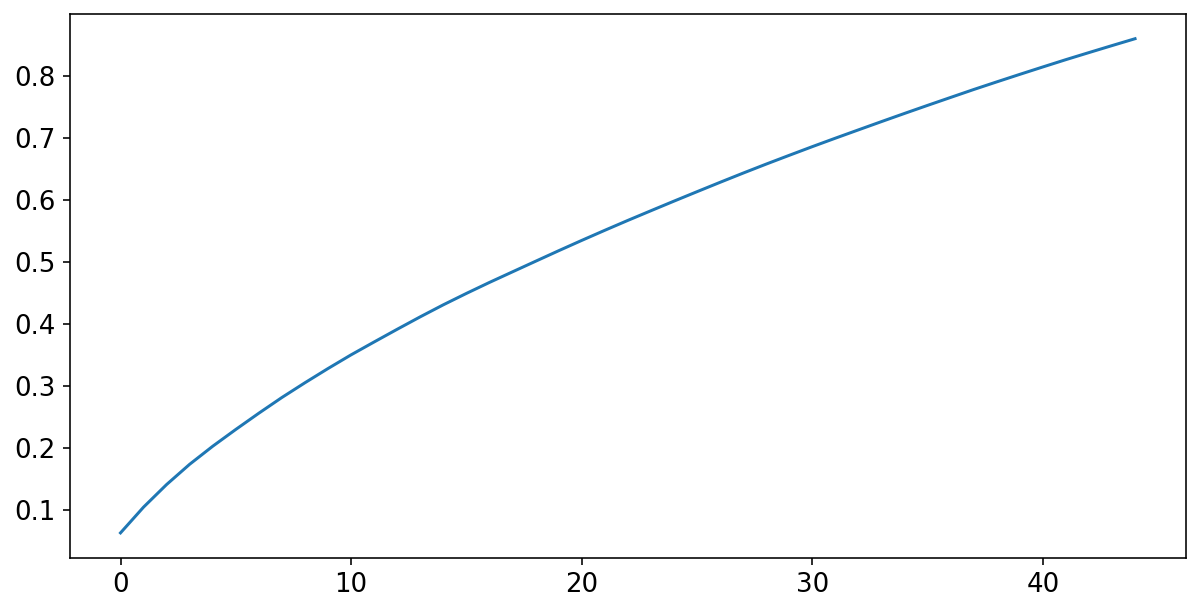

In [70]:
pca= PCA(n_components=45,svd_solver="full")
pca.fit(columns_ohe)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [71]:
columns_ohe_pca=pca.transform(columns_ohe)

In [72]:
columns_ohe_pca

array([[-2.39703673, -0.45051778, -0.32370156, ..., -0.53764801,
         0.06132097,  0.10484301],
       [ 1.99202492,  1.93011291,  0.74679312, ...,  0.45264251,
         0.24255344, -1.52792557],
       [-2.3444914 , -0.41014805, -0.33787029, ..., -0.53075467,
         0.05187112,  0.04219317],
       ...,
       [-0.57637696, -0.29435542,  0.01523294, ...,  0.91690453,
         2.14778311, -1.87834081],
       [ 0.83462848,  0.85682328, -1.41631153, ..., -0.28865   ,
        -0.49744961,  0.12512612],
       [ 1.8151335 ,  1.09604995, -1.5077875 , ..., -0.04944194,
        -0.11926005, -0.12232725]])

In [73]:
pipe = Pipeline([
    ("select_cols", column_selector),
    ("pca",pca),
    ("lasso", Lasso(alpha=0.1, tol=0.5))
])

In [74]:
train, test = train_test_split(housing_train, test_size=0.2, random_state=2501)
xtrain, ytrain = train.drop("SalePrice", axis=1), train["SalePrice"]

cv = cross_validate(pipe, xtrain, ytrain, cv=5, scoring=["r2", "neg_mean_absolute_error"])
r2 = cv["test_r2"]
mae = -cv["test_neg_mean_absolute_error"]

In [75]:
print(f"mean r2: {r2.mean():0.2f}")
print(f"mean mae: {mae.mean():,.2f}")

mean r2: 0.67
mean mae: 29,597.70


## Demostracion Sigmoide Regresion Logistica

$$
\begin{align}
\frac{d}{dx}\sigma(x)&=\frac{d}{dx}\frac{1}{1+e^{-x}} \\
&= \frac{-(1+e^{-x})}{(1+e^{-x})^2}\\
&= \frac{e^{-x}}{(1+e^{-x})^2}\\
&= \left (\frac{1}{1+e^{-x}}\right) \left(\frac{e^{-x}}{1+e^{-x}}\right)\\
&= \left (\frac{1}{1+e^{-x}}\right) \left(\frac{1+e^{-x}}{1+e^{-x}}-\frac{1}{1+e^{-x}}\right)\\
&= \sigma(x)\left(\frac{1+e^{-x}}{1+e^{-x}}-\sigma(x)\right)\\
&= \sigma(x)(1-\sigma(x))
\end{align}
$$